In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv(r'C:\Users\Wissen\Desktop\EDA\signal_metrics.csv')

In [3]:
df.head()

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
0,2023-05-05 12:50:40.000000,Anisabad,25.599109,85.137355,-84.274113,0.0,1.863890,129.122914,3G,0.000000,0.000000,0.000000
1,2023-05-05 12:53:47.210173,Fraser Road,25.433286,85.070053,-97.653121,0.0,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892
2,2023-05-05 12:56:54.420346,Boring Canal Road,25.498809,85.211371,-87.046134,0.0,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070
3,2023-05-05 13:00:01.630519,Danapur,25.735138,85.208400,-94.143159,0.0,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698
4,2023-05-05 13:03:08.840692,Phulwari Sharif,25.538556,85.159860,-94.564765,0.0,38.292038,30.342828,5G,-90.489100,-103.318304,-95.102467


In [4]:
df.columns

Index(['Timestamp', 'Locality', 'Latitude', 'Longitude',
       'Signal Strength (dBm)', 'Signal Quality (%)', 'Data Throughput (Mbps)',
       'Latency (ms)', 'Network Type', 'BB60C Measurement (dBm)',
       'srsRAN Measurement (dBm)', 'BladeRFxA9 Measurement (dBm)'],
      dtype='object')

In [5]:
df.tail()

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
16824,2023-06-10 23:44:23.950552,Pataliputra,25.542846,85.129611,-92.024221,0.0,3.720856,53.376474,4G,-90.177947,-97.971619,-93.362041
16825,2023-06-10 23:47:31.160725,Boring Canal Road,25.724624,85.233365,-87.579509,0.0,2.117080,134.458401,LTE,-87.694985,-92.616868,-84.749607
16826,2023-06-10 23:50:38.370898,Boring Road,25.574020,85.030036,-90.451396,0.0,72.870842,32.556578,5G,-91.098875,-97.447725,-87.752628
16827,2023-06-10 23:53:45.581071,Boring Road,25.619325,85.183155,-85.661814,0.0,2.482843,144.007572,3G,0.000000,0.000000,0.000000
16828,2023-06-10 23:56:52.791244,Rajendra Nagar,25.682516,85.264655,-93.228967,0.0,1.638291,123.234570,LTE,-95.598301,-99.438645,-94.268015


In [6]:
df.shape

(16829, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16829 entries, 0 to 16828
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     16829 non-null  object 
 1   Locality                      16829 non-null  object 
 2   Latitude                      16829 non-null  float64
 3   Longitude                     16829 non-null  float64
 4   Signal Strength (dBm)         16829 non-null  float64
 5   Signal Quality (%)            16829 non-null  float64
 6   Data Throughput (Mbps)        16829 non-null  float64
 7   Latency (ms)                  16829 non-null  float64
 8   Network Type                  16829 non-null  object 
 9   BB60C Measurement (dBm)       16829 non-null  float64
 10  srsRAN Measurement (dBm)      16829 non-null  float64
 11  BladeRFxA9 Measurement (dBm)  16829 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.5+ MB


In [8]:
df

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
0,2023-05-05 12:50:40.000000,Anisabad,25.599109,85.137355,-84.274113,0.0,1.863890,129.122914,3G,0.000000,0.000000,0.000000
1,2023-05-05 12:53:47.210173,Fraser Road,25.433286,85.070053,-97.653121,0.0,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892
2,2023-05-05 12:56:54.420346,Boring Canal Road,25.498809,85.211371,-87.046134,0.0,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070
3,2023-05-05 13:00:01.630519,Danapur,25.735138,85.208400,-94.143159,0.0,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698
4,2023-05-05 13:03:08.840692,Phulwari Sharif,25.538556,85.159860,-94.564765,0.0,38.292038,30.342828,5G,-90.489100,-103.318304,-95.102467
...,...,...,...,...,...,...,...,...,...,...,...,...
16824,2023-06-10 23:44:23.950552,Pataliputra,25.542846,85.129611,-92.024221,0.0,3.720856,53.376474,4G,-90.177947,-97.971619,-93.362041
16825,2023-06-10 23:47:31.160725,Boring Canal Road,25.724624,85.233365,-87.579509,0.0,2.117080,134.458401,LTE,-87.694985,-92.616868,-84.749607
16826,2023-06-10 23:50:38.370898,Boring Road,25.574020,85.030036,-90.451396,0.0,72.870842,32.556578,5G,-91.098875,-97.447725,-87.752628
16827,2023-06-10 23:53:45.581071,Boring Road,25.619325,85.183155,-85.661814,0.0,2.482843,144.007572,3G,0.000000,0.000000,0.000000


In [9]:
df.describe() 

,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
count,16829.000000,16829.000000,16829.000000,16829.0,16829.000000,16829.000000,16829.000000,16829.000000,16829.000000
mean,25.594796,85.137314,-90.072484,0.0,16.182856,101.313624,-68.820150,-74.439562,-68.819930
std,0.089881,0.090095,5.399368,0.0,25.702734,56.010418,40.046739,43.215204,39.996934
min,25.414575,84.957936,-116.942267,0.0,1.000423,10.019527,-115.667514,-124.652054,-119.207545
25%,25.522858,85.064124,-93.615962,0.0,2.001749,50.320775,-94.021959,-101.249987,-93.749032
50%,25.595383,85.138149,-89.665566,0.0,2.997175,100.264318,-89.126942,-96.838442,-89.282746
75%,25.667620,85.209504,-86.145491,0.0,9.956314,149.951112,0.000000,0.000000,0.000000
max,25.773648,85.316994,-74.644848,0.0,99.985831,199.991081,0.000000,0.000000,0.000000


In [10]:
df.sort_values(['Data Throughput (Mbps)','Signal Strength (dBm)','Latency (ms)'],ascending=False,inplace=True)
df

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
8199,2023-05-23 07:12:56.208427,Exhibition Road,25.592443,85.300830,-93.655535,0.0,99.985831,12.704793,5G,-95.286192,-100.482376,-91.509044
4328,2023-05-14 21:54:45.628744,Anisabad,25.655706,85.174268,-93.221855,0.0,99.958836,20.768165,5G,-93.595158,-99.447384,-93.419943
449,2023-05-06 12:11:37.367677,Ashok Rajpath,25.570501,85.063157,-96.550494,0.0,99.954672,20.522789,5G,-95.789685,-103.068305,-98.562730
6113,2023-05-18 18:44:15.787549,Gandhi Maidan,25.603158,85.105024,-91.657683,0.0,99.948554,43.563294,5G,-92.573276,-97.760153,-93.541596
48,2023-05-05 15:20:26.088304,Kankarbagh,25.761765,85.076115,-94.482611,0.0,99.941815,32.232263,5G,-94.750510,-102.918337,-96.759476
...,...,...,...,...,...,...,...,...,...,...,...,...
135,2023-05-05 19:51:53.373355,Rajendra Nagar,25.563631,85.141276,-87.249434,0.0,1.000886,190.138310,3G,0.000000,0.000000,0.000000
4912,2023-05-16 04:16:56.369776,Bailey Road,25.731493,85.233049,-87.860158,0.0,1.000825,165.281164,LTE,-84.049775,-97.520547,-89.067240
13931,2023-06-04 17:17:44.920063,Patliputra Colony,25.651190,85.271765,-86.527811,0.0,1.000678,138.767318,3G,0.000000,0.000000,0.000000
4614,2023-05-15 12:47:07.738222,Anandpuri,25.469318,85.205290,-80.868121,0.0,1.000556,108.334828,3G,0.000000,0.000000,0.000000


In [11]:
network_types=df["Network Type"].value_counts()
network_types

LTE    4224
4G     4219
3G     4208
5G     4178
Name: Network Type, dtype: int64

In [12]:
df["BB60C Measurement (dBm)"].isna().sum()

0

In [13]:
print("Maximum measurement of BB6OC:", df["BB60C Measurement (dBm)"].max())
print("Minimum measurement of BB60C:", df["BB60C Measurement (dBm)"].min())

Maximum measurement of BB6OC: 0.0
Minimum measurement of BB60C: -115.66751382024088


In [14]:
df.head()

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
8199,2023-05-23 07:12:56.208427,Exhibition Road,25.592443,85.300830,-93.655535,0.0,99.985831,12.704793,5G,-95.286192,-100.482376,-91.509044
4328,2023-05-14 21:54:45.628744,Anisabad,25.655706,85.174268,-93.221855,0.0,99.958836,20.768165,5G,-93.595158,-99.447384,-93.419943
449,2023-05-06 12:11:37.367677,Ashok Rajpath,25.570501,85.063157,-96.550494,0.0,99.954672,20.522789,5G,-95.789685,-103.068305,-98.562730
6113,2023-05-18 18:44:15.787549,Gandhi Maidan,25.603158,85.105024,-91.657683,0.0,99.948554,43.563294,5G,-92.573276,-97.760153,-93.541596
48,2023-05-05 15:20:26.088304,Kankarbagh,25.761765,85.076115,-94.482611,0.0,99.941815,32.232263,5G,-94.750510,-102.918337,-96.759476


In [15]:
df["srsRAN Measurement (dBm)"].isna().sum()

0

In [16]:
print("Maximum measurement of srsRAN:", df["srsRAN Measurement (dBm)"].max())
print("Minimum measurement of srsRAN:", df["srsRAN Measurement (dBm)"].min())

Maximum measurement of srsRAN: 0.0
Minimum measurement of srsRAN: -124.65205443893674


In [17]:
df["BladeRFxA9 Measurement (dBm)"].isna().sum()

0

In [18]:
print("Maximum measurement of BladeRFxA9:", df["BladeRFxA9 Measurement (dBm)"].max())
print("Minimum measurement of BladeRFxA9:", df["BladeRFxA9 Measurement (dBm)"].min())

Maximum measurement of BladeRFxA9: 0.0
Minimum measurement of BladeRFxA9: -119.20754493363496


In [19]:
df.head()

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
8199,2023-05-23 07:12:56.208427,Exhibition Road,25.592443,85.300830,-93.655535,0.0,99.985831,12.704793,5G,-95.286192,-100.482376,-91.509044
4328,2023-05-14 21:54:45.628744,Anisabad,25.655706,85.174268,-93.221855,0.0,99.958836,20.768165,5G,-93.595158,-99.447384,-93.419943
449,2023-05-06 12:11:37.367677,Ashok Rajpath,25.570501,85.063157,-96.550494,0.0,99.954672,20.522789,5G,-95.789685,-103.068305,-98.562730
6113,2023-05-18 18:44:15.787549,Gandhi Maidan,25.603158,85.105024,-91.657683,0.0,99.948554,43.563294,5G,-92.573276,-97.760153,-93.541596
48,2023-05-05 15:20:26.088304,Kankarbagh,25.761765,85.076115,-94.482611,0.0,99.941815,32.232263,5G,-94.750510,-102.918337,-96.759476


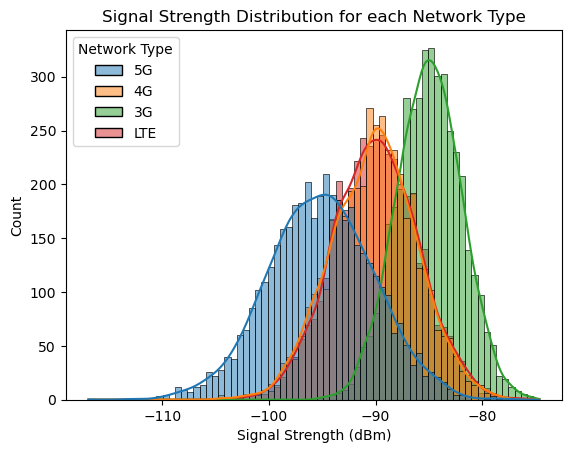

In [20]:
sns.histplot(data=df, x='Signal Strength (dBm)', hue='Network Type', kde=True)
plt.title('Signal Strength Distribution for each Network Type')
plt.show()

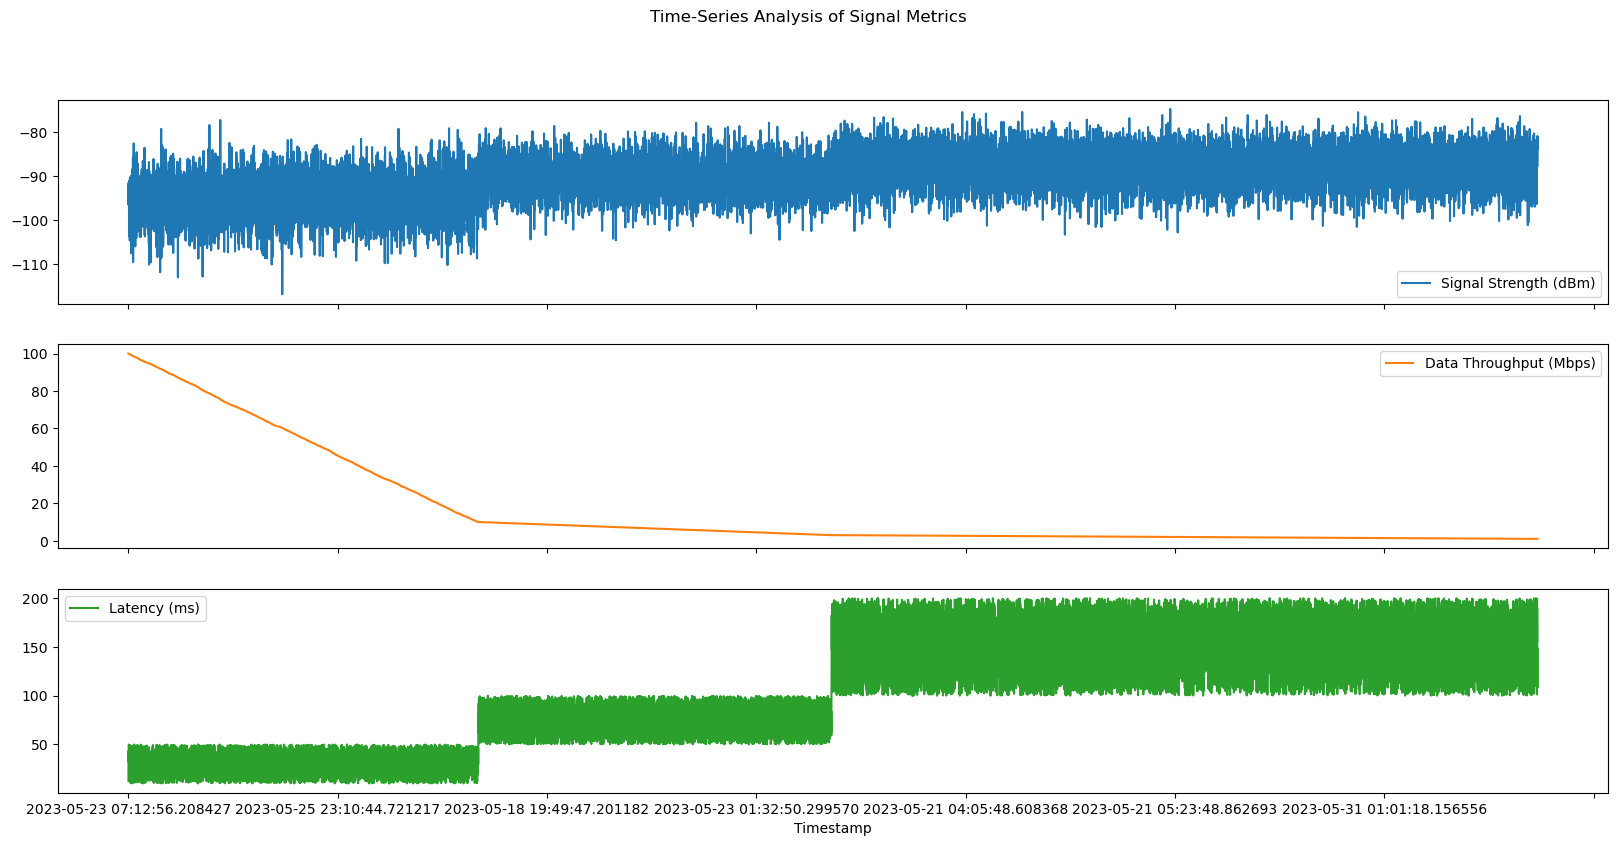

In [21]:

time_series_columns = ['Timestamp', 'Signal Strength (dBm)', 'Data Throughput (Mbps)', 'Latency (ms)']
df[time_series_columns].plot(x='Timestamp', subplots=True, figsize=(20, 9))
plt.suptitle('Time-Series Analysis of Signal Metrics')
plt.show()

In [22]:
performance_metrics = df.groupby(['Network Type', 'BB60C Measurement (dBm)'])[['Signal Strength (dBm)', 'Data Throughput (Mbps)', 'Latency (ms)']].mean()
performance_metrics = performance_metrics.sort_values(by='BB60C Measurement (dBm)', ascending=True)
                                                       

In [23]:
(performance_metrics)

Signal Strength (dBm)  \
Network Type BB60C Measurement (dBm)                          
5G           -115.667514                        -112.907955   
             -114.610262                        -116.942267   
             -112.712430                        -107.811668   
             -112.678528                        -109.858119   
             -112.513741                        -108.702132   
...                                                     ...   
LTE          -74.040474                          -78.770637   
             -73.882104                          -78.557900   
             -73.458482                          -77.523353   
             -72.503415                          -76.724458   
3G            0.000000                           -85.010978   

                                      Data Throughput (Mbps)  Latency (ms)  
Network Type BB60C Measurement (dBm)                                        
5G           -115.667514                           80.384752     39.461865  
             -114.610262                           60.180484     27.544595  
             -112.712430                           57.784391     33.805267  
             -112.678528                           33.140931     35.359651  
             -112.513741                           64.301047     11.252871  
...                                                      ...           ...  
LTE          -74.040474                             1.461008    101.680017  
             -73.882104                             1.031408    165.444681  
             -73.458482                             2.476287    137.660616  
             -72.503415                             1.105452    138.938281  
3G            0.000000                              2.006362    149.414617  

[12622 rows x 3 columns]

In [24]:
performance_metrics1 = df.groupby(['Network Type', 'srsRAN Measurement (dBm)'])[['Signal Strength (dBm)', 'Data Throughput (Mbps)', 'Latency (ms)']].mean()
performance_metrics1 = performance_metrics1.sort_values(by='srsRAN Measurement (dBm)', ascending=True)


In [25]:
(performance_metrics1 )

Signal Strength (dBm)  \
Network Type srsRAN Measurement (dBm)                          
5G           -124.652054                         -116.942267   
             -121.598760                         -112.907955   
             -121.181812                         -113.082820   
             -120.076150                         -110.253857   
             -118.861071                         -110.167665   
...                                                      ...   
             -83.421969                           -78.313346   
LTE          -83.113428                           -76.501382   
             -81.980908                           -76.379179   
             -81.320092                           -74.644848   
3G            0.000000                            -85.010978   

                                       Data Throughput (Mbps)  Latency (ms)  
Network Type srsRAN Measurement (dBm)                                        
5G           -124.652054                            60.180484     27.544595  
             -121.598760                            80.384752     39.461865  
             -121.181812                            87.107131     26.096697  
             -120.076150                            17.437698     33.096835  
             -118.861071                            94.757823     23.107691  
...                                                       ...           ...  
             -83.421969                             78.630808     14.983783  
LTE          -83.113428                              2.861152    154.414633  
             -81.980908                              1.487846    127.231227  
             -81.320092                              2.049014    148.267847  
3G            0.000000                               2.006362    149.414617  

[12622 rows x 3 columns]

In [26]:
performance_metrics2 = df.groupby(['Network Type', 'BladeRFxA9 Measurement (dBm)'])[['Signal Strength (dBm)', 'Data Throughput (Mbps)', 'Latency (ms)']].mean()
performance_metrics2 = performance_metrics2.sort_values(by='BladeRFxA9 Measurement (dBm)', ascending=True)


In [27]:
(performance_metrics2 )

Signal Strength (dBm)  \
Network Type BladeRFxA9 Measurement (dBm)                          
5G           -119.207545                             -116.942267   
             -114.683401                             -112.907955   
             -114.603183                             -111.899047   
             -113.898226                             -113.082820   
             -112.789917                             -110.127088   
...                                                          ...   
4G           -75.906960                               -78.741267   
LTE          -75.573688                               -77.271285   
             -75.127787                               -76.724458   
             -74.512825                               -75.672853   
3G            0.000000                                -85.010978   

                                           Data Throughput (Mbps)  \
Network Type BladeRFxA9 Measurement (dBm)                           
5G           -119.207545                                60.180484   
             -114.683401                                80.384752   
             -114.603183                                91.925830   
             -113.898226                                87.107131   
             -112.789917                                62.409514   
...                                                           ...   
4G           -75.906960                                  5.053948   
LTE          -75.573688                                  1.792531   
             -75.127787                                  1.105452   
             -74.512825                                  2.572450   
3G            0.000000                                   2.006362   

                                           Latency (ms)  
Network Type BladeRFxA9 Measurement (dBm)                
5G           -119.207545                      27.544595  
             -114.683401                      39.461865  
             -114.603183                      34.831318  
             -113.898226                      26.096697  
             -112.789917                      12.104886  
...                                                 ...  
4G           -75.906960                       61.023371  
LTE          -75.573688                      177.472569  
             -75.127787                      138.938281  
             -74.512825                      131.517828  
3G            0.000000                       149.414617  

[12622 rows x 3 columns]

In [28]:
#2. To Identify key factors that contribute to a device's performance.
performance_metric ='Data Throughput (Mbps)'

In [29]:
if performance_metric not in df.columns:
    raise ValueError(f"Column '{performance_metric}' not found in the DataFrame.")

In [30]:
numeric_columns = df.select_dtypes(include=[float,int])

In [31]:
correlation_matrix = numeric_columns.corr()

In [32]:
correlation_with_performance = correlation_matrix[performance_metric].sort_values(ascending=False)

In [33]:
print("Correlation with Device Performance:")
print(correlation_with_performance)

Correlation with Device Performance:
Data Throughput (Mbps)          1.000000
Longitude                       0.003507
Latitude                        0.000526
srsRAN Measurement (dBm)       -0.355608
BB60C Measurement (dBm)        -0.358088
BladeRFxA9 Measurement (dBm)   -0.358540
Signal Strength (dBm)          -0.483769
Latency (ms)                   -0.668173
Signal Quality (%)                   NaN
Name: Data Throughput (Mbps), dtype: float64


In [34]:
# Let's assume 'Data Throughput (Mbps)' is the chosen performance metric
performance_metric = 'Data Throughput (Mbps)'

In [35]:
# Perform ANOVA test
groups = df['Network Type'].unique()
anova_results = []
for group in groups:
    group_data = df[df['Network Type'] == group][performance_metric]
    anova_results.append(group_data)

In [36]:
statistic, p_value = f_oneway(*anova_results)

In [37]:
# Check the results
print("ANOVA results:")
print("F-statistic:", statistic)
print("p-value:", p_value)

ANOVA results:
F-statistic: 16159.147850515375
p-value: 0.0


In [38]:
key_factors = correlation_with_performance[correlation_with_performance > 0].index.tolist()

In [39]:
print("\nKey Factors Contributing to Device Performance:")
print(key_factors)


Key Factors Contributing to Device Performance:
['Data Throughput (Mbps)', 'Longitude', 'Latitude']


In [40]:
#3
df

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
8199,2023-05-23 07:12:56.208427,Exhibition Road,25.592443,85.300830,-93.655535,0.0,99.985831,12.704793,5G,-95.286192,-100.482376,-91.509044
4328,2023-05-14 21:54:45.628744,Anisabad,25.655706,85.174268,-93.221855,0.0,99.958836,20.768165,5G,-93.595158,-99.447384,-93.419943
449,2023-05-06 12:11:37.367677,Ashok Rajpath,25.570501,85.063157,-96.550494,0.0,99.954672,20.522789,5G,-95.789685,-103.068305,-98.562730
6113,2023-05-18 18:44:15.787549,Gandhi Maidan,25.603158,85.105024,-91.657683,0.0,99.948554,43.563294,5G,-92.573276,-97.760153,-93.541596
48,2023-05-05 15:20:26.088304,Kankarbagh,25.761765,85.076115,-94.482611,0.0,99.941815,32.232263,5G,-94.750510,-102.918337,-96.759476
...,...,...,...,...,...,...,...,...,...,...,...,...
135,2023-05-05 19:51:53.373355,Rajendra Nagar,25.563631,85.141276,-87.249434,0.0,1.000886,190.138310,3G,0.000000,0.000000,0.000000
4912,2023-05-16 04:16:56.369776,Bailey Road,25.731493,85.233049,-87.860158,0.0,1.000825,165.281164,LTE,-84.049775,-97.520547,-89.067240
13931,2023-06-04 17:17:44.920063,Patliputra Colony,25.651190,85.271765,-86.527811,0.0,1.000678,138.767318,3G,0.000000,0.000000,0.000000
4614,2023-05-15 12:47:07.738222,Anandpuri,25.469318,85.205290,-80.868121,0.0,1.000556,108.334828,3G,0.000000,0.000000,0.000000


In [41]:
#signal strength   
df['Signal Strength (dBm)'].corr(df['BB60C Measurement (dBm)'])

0.6217243483459353

In [42]:
df['Signal Strength (dBm)'].corr(df['srsRAN Measurement (dBm)'])

0.6169744116682869

In [43]:
df['Signal Strength (dBm)'].corr(df['BladeRFxA9 Measurement (dBm)'])

0.6226106890648941

In [44]:
# Data Throughput (Mbps)
df['Data Throughput (Mbps)'].corr(df['BB60C Measurement (dBm)'])

-0.3580876682302495

In [45]:
df['Data Throughput (Mbps)'].corr(df['srsRAN Measurement (dBm)'])

-0.3556079321518512

In [46]:
df['Data Throughput (Mbps)'].corr(df['BladeRFxA9 Measurement (dBm)'])

-0.3585396813006251

In [47]:
#Latency (ms)
df['Latency (ms)'].corr(df['BB60C Measurement (dBm)'])

0.5238980357199854

In [48]:
df['Latency (ms)'].corr(df['srsRAN Measurement (dBm)'])

0.5223734743737993

In [49]:
df['Latency (ms)'].corr(df['BladeRFxA9 Measurement (dBm)'])

0.524406437324709

<h1>Report</h1>

1. The dataset contains 12 columns and 16829 rows.<br>
2. No missing values were found in any of the columns.<br>
3. The "Signal Quality (%)" column contains no data, so it can be neglected.<br> 
 
4. Each device performs differently for each network .For 3G, BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm), all the devices are having same performence.<br>

5. For 4G, BladeRFxA9 Measurement (dBm) performs better than other devices.<br>

6. For 5G, BladeRFxA9 Measurement (dBm) permforms better than other devices.<br>

7. For LTE, BladeRFxA9 Measurement (dBm) performs better than other devices.<br>
8. The visualzation is done to see the Signal Strength Distribution for each Network Type.<br>
9. The visualzation is done to see the Time-Series Analysis of Signal Metrics. <br>

10. The key factors for device performance are 'Data Throughput (Mbps)', 'Longitude', and 'Latitude'. These factors were determined by performing an ANOVA (Analysis of Variance) test, which helps to assess whether there are significant differences in the performance of devices based on these factors.<br>

<h4>  This is a plan to optimize the usage of these three devices</h4>
11. Device selection: Choose the most suitable device for signal metrics collection based on Signal Strength, range, and           compatibility with network types.<br>
12. Strategic Deployment: Place devices strategically in locations with varying signal strengths and network types.<br>
13. Regular Data Collection:  Set up a schedule for consistent data collection at different times of the day and week.<br>
14. Data Synchronization: Ensure data from all devices is synchronized for accurate analysis.<br>
15. Data Validation: Implement validation checks to identify and remove erroneous data.<br>
16. Secure Data Storage: Store collected data securely and back it up regularly.<br>
17. Simple Data Analysis,Perform basic data analysis to gain insights into network performance.<br>
18. Feedback Loop: Continuously gather feedback to improve the plan's effectiveness.<br>
19. Adaptability: Ensure the plan can accommodate future network technologies.<br>
20. Privacy Measures: Prioritize data security and privacy during the process.<br>




